None


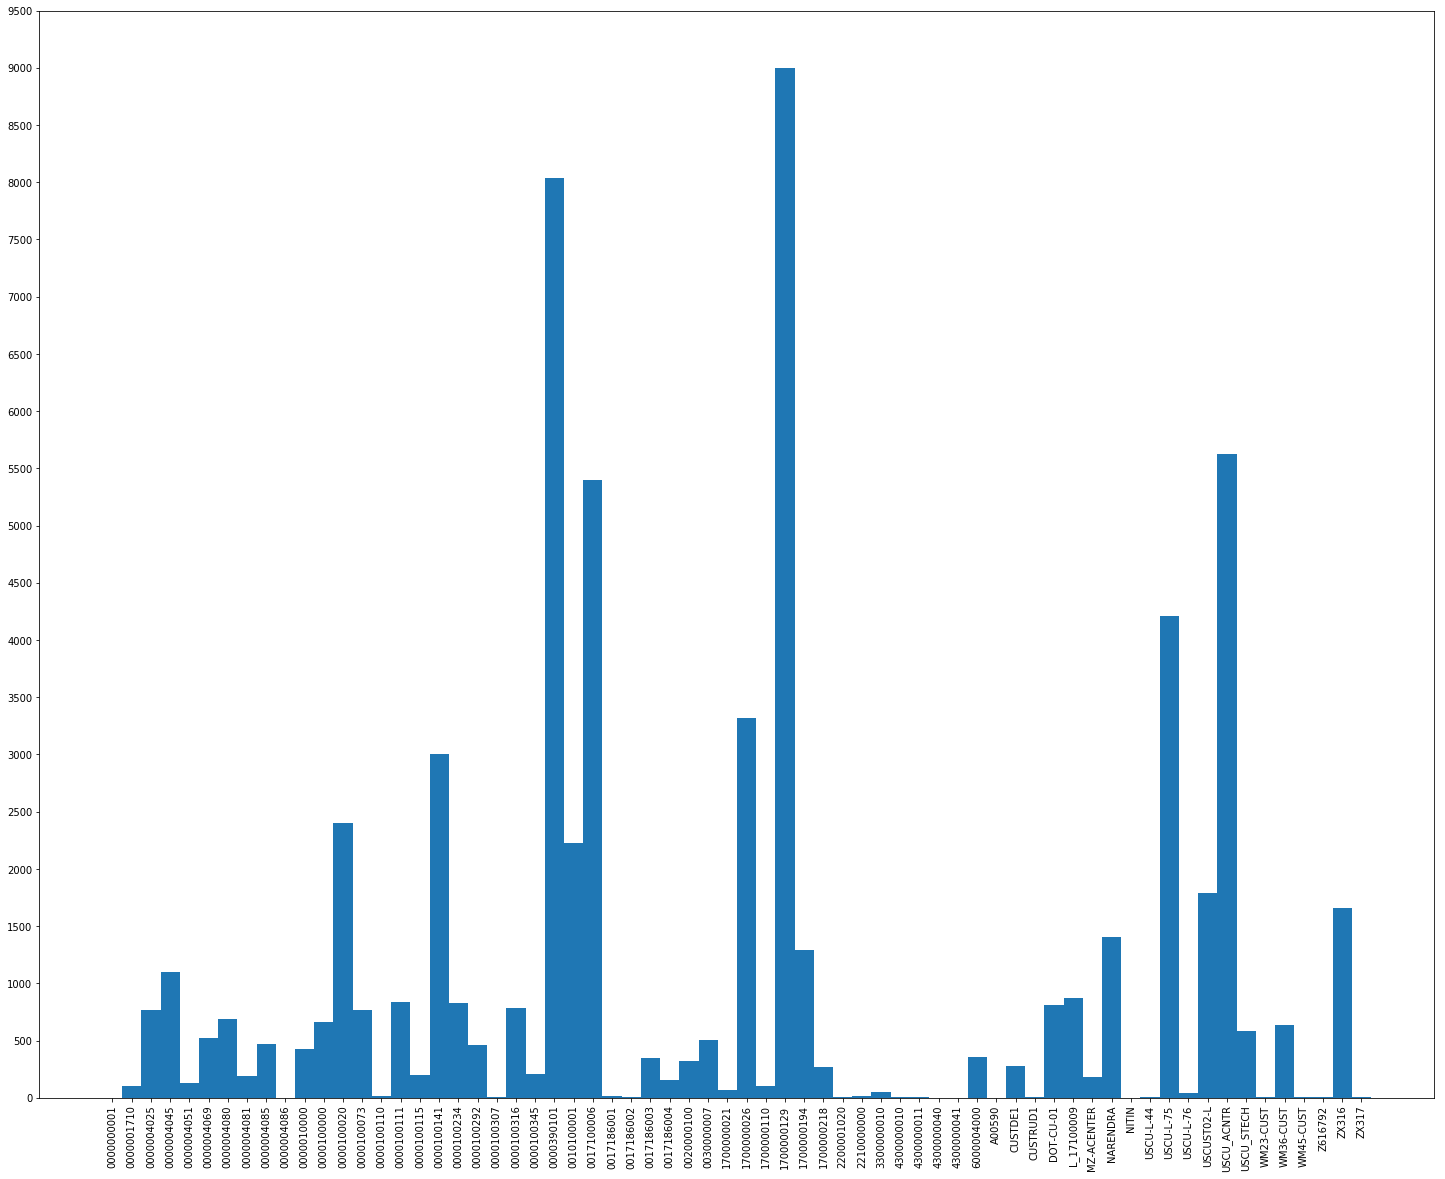

In [98]:
from hdbcli import dbapi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
conn = dbapi.connect(address='XXX',port='XXXX',user='XXXX',password='XXXX')
cur = conn.cursor()
print(cur.description)
try:
    cur.execute("SELECT KUNNR,SUM(NETWR) AMOUNT FROM SAPABAP2.VBAK WHERE NETWR > 0 AND KUNNR != '0000100014' GROUP BY KUNNR HAVING SUM(NETWR) < 10000")
    df_temp = pd.DataFrame(cur.fetchall())
    df_temp.apply(pd.to_numeric,errors='coerce')
    df2 = pd.DataFrame(df_temp.iloc[:,1].values, index = df_temp.iloc[:,0])
    df2.columns=list(['Amount'])
    df2.index.name = 'Customer'
    ind = np.arange(len(df2.index))
    width = 1
    fig_size = plt.rcParams["figure.figsize"] 
    fig_size[0] = 25 #Width
    fig_size[1] = 20 # Height
    plt.rcParams["figure.figsize"] = fig_size
    plt.bar(ind,df2.iloc[:,0].values,width)
    plt.xticks(ind,list(df2.index),rotation='vertical')
    plt.yticks(np.arange(0,10000,500))
    plt.show()
    fig_size = plt.rcParams["figure.figsize"] 
except Exception:
    print("Error")
conn.close()